In [2]:
# Import libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [3]:
# Read in data
df = pd.read_csv('energy_prediction_dataset.csv')

In [4]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,2016-11-21 04:00:00+01:00,338.0,609.0,0.0,3439.0,1450.0,182.0,0.0,0.0,0.0,...,281.0,0.0,13810.0,25,NaN,13793,21463,21697.0,10.88,20.32
16565,2016-11-21 05:00:00+01:00,343.0,613.0,0.0,3451.0,1748.0,198.0,0.0,0.0,0.0,...,285.0,0.0,13656.0,16,NaN,13685,22266,22441.0,20.00,28.11
16566,2016-11-21 06:00:00+01:00,355.0,736.0,0.0,3817.0,2548.0,226.0,0.0,0.0,0.0,...,290.0,0.0,13841.0,7,NaN,13742,25171,25567.0,35.00,43.18
16567,2016-11-21 07:00:00+01:00,360.0,886.0,0.0,4268.0,3342.0,235.0,0.0,0.0,0.0,...,296.0,0.0,14016.0,4,NaN,13960,29517,29818.0,46.40,53.06


## Predicting the Price of Electricty with Machine Learning

### Data Contents -
- This dataset contains four years of electrical consumption, generation, pricing, and weather data for Spain.
- Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.
- The dataset was retrieved from Kaggle.com  

### Column Meanings -



- Time: Datetime index localized to CET
- Generation biomass: biomass generation in MW
- Generation fossil brown coal/lignite: coal/lignite generation in MW
- Generation fossil coal-derived gas: coal gas generation in MW
- Generation fossil gas: gas generation in MW
- Generation fossil hard coal: coal generation in MW
- Generation fossil oil: oil generation in MW
- Generation fossil oil shale: shale oil generation in MW
- Generation fossil peat: peat generation in MW
- Generation geothermal: geothermal generation in MW
- Generation hydro pumped storage aggregated: hydro1 generation in MW
- Generation hydro pumped storage consumption: hydro2 generation in MW
- Generation hydro run-of-river and poundage: hydro3 generation in MW
- Generation hydro water reservoir: hydro4 generation in MW
- Generation marine: sea generation in MW
- Generation nuclear: nuclear generation in MW
- Generation other: other generation in MW
- Generation other renewable: other renewable generation in MW
- Generation solar: solar generation in MW
- Generation waste: waste generation in MW
- Generation wind offshore: wind offshore generation in MW
- Generation wind onshore: wind onshore generation in MW
- Gorecast solar day ahead: forecasted solar generation
- Gorecast wind offshore eday ahead: forecasted offshore wind generation
- Gorecast wind onshore day ahead: forecasted onshore wind generation
- Total load forecast: forecasted electrical demand
- Total load actual: actual electrical demand
- Price day ahead: forecasted price EUR/MWh
- Price actual: price in EUR/MWh

In [5]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [6]:
df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
16564,2016-11-21 04:00:00+01:00,338.0,609.0,0.0,3439.0,1450.0,182.0,0.0,0.0,0.0,...,281.0,0.0,13810.0,25,NaN,13793,21463,21697.0,10.88,20.32
16565,2016-11-21 05:00:00+01:00,343.0,613.0,0.0,3451.0,1748.0,198.0,0.0,0.0,0.0,...,285.0,0.0,13656.0,16,NaN,13685,22266,22441.0,20.00,28.11
16566,2016-11-21 06:00:00+01:00,355.0,736.0,0.0,3817.0,2548.0,226.0,0.0,0.0,0.0,...,290.0,0.0,13841.0,7,NaN,13742,25171,25567.0,35.00,43.18
16567,2016-11-21 07:00:00+01:00,360.0,886.0,0.0,4268.0,3342.0,235.0,0.0,0.0,0.0,...,296.0,0.0,14016.0,4,NaN,13960,29517,29818.0,46.40,53.06
16568,2016-11-21 08:00:00+01:00,364.0,905.0,0.0,4925.0,4027.0,267.0,0.0,0.0,0.0,...,297.0,0.0,13836.0,89,NaN,13867,32028,32074.0,49.40,57.51


In [7]:
# .Describe to show overview of data
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,16552.000000,16552.000000,16552.0,16552.000000,16552.000000,16551.000000,16552.0,16552.0,16552.0,0.0,...,16551.000000,16552.0,16552.000000,16569.000000,0.0,16569.000000,16569.000000,16537.000000,16569.000000,16569.000000
mean,433.164149,431.282262,0.0,5022.886056,4453.370408,310.129418,0.0,0.0,0.0,NaN,...,238.744003,0.0,5498.574795,1470.693222,NaN,5498.758223,28409.930955,28383.909234,44.475656,53.667367
std,91.221395,389.813397,0.0,1728.186065,2168.005375,59.506841,0.0,0.0,0.0,NaN,...,49.556536,0.0,3271.684198,1686.149342,NaN,3259.469267,4554.901644,4519.015573,14.525257,14.955132
min,101.000000,0.000000,0.0,1518.000000,576.000000,87.000000,0.0,0.0,0.0,NaN,...,39.000000,0.0,234.000000,0.000000,NaN,237.000000,18164.000000,18041.000000,2.300000,9.330000
25%,358.000000,0.000000,0.0,3921.000000,2401.750000,271.000000,0.0,0.0,0.0,NaN,...,205.000000,0.0,2890.000000,77.000000,NaN,2908.000000,24523.000000,24549.000000,35.900000,44.170000
50%,448.000000,448.000000,0.0,4597.000000,4839.500000,306.000000,0.0,0.0,0.0,NaN,...,245.000000,0.0,4853.500000,606.000000,NaN,4858.000000,28669.000000,28629.000000,45.020000,53.660000
75%,513.000000,865.000000,0.0,5620.000000,6194.000000,354.000000,0.0,0.0,0.0,NaN,...,273.000000,0.0,7474.250000,2693.000000,NaN,7470.000000,31870.000000,31760.000000,55.440000,64.660000
max,592.000000,997.000000,0.0,16250.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,343.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,40324.000000,85.050000,102.620000


In [8]:
corr=df.corr()
corr

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.269364,NaN,0.084501,0.493663,0.501383,NaN,NaN,NaN,NaN,...,-0.125432,NaN,-0.040422,-0.045118,NaN,-0.041835,0.143211,0.141931,0.432715,0.458818
generation fossil brown coal/lignite,0.269364,1.000000,NaN,0.559343,0.836375,0.362253,NaN,NaN,NaN,NaN,...,0.421388,NaN,-0.488628,0.063882,NaN,-0.489083,0.286364,0.288201,0.691891,0.452038
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,0.084501,0.559343,NaN,1.000000,0.591996,0.355666,NaN,NaN,NaN,NaN,...,0.330604,NaN,-0.469793,0.062750,NaN,-0.470973,0.508147,0.512802,0.691515,0.455213
generation fossil hard coal,0.493663,0.836375,NaN,0.591996,1.000000,0.494003,NaN,NaN,NaN,NaN,...,0.367762,NaN,-0.525253,0.075237,NaN,-0.526864,0.366265,0.368031,0.834165,0.594500
generation fossil oil,0.501383,0.362253,NaN,0.355666,0.494003,1.000000,NaN,NaN,NaN,NaN,...,-0.111944,NaN,-0.078017,0.086329,NaN,-0.080392,0.525524,0.523734,0.505157,0.478611
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage aggregated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Info to show datatype, nulls, and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         16569 non-null  object 
 1   generation biomass                           16552 non-null  float64
 2   generation fossil brown coal/lignite         16552 non-null  float64
 3   generation fossil coal-derived gas           16552 non-null  float64
 4   generation fossil gas                        16552 non-null  float64
 5   generation fossil hard coal                  16552 non-null  float64
 6   generation fossil oil                        16551 non-null  float64
 7   generation fossil oil shale                  16552 non-null  float64
 8   generation fossil peat                       16552 non-null  float64
 9   generation geothermal                        16552 non-null  float64
 10

In [10]:
#Isnull to get amount of null values in each column
df.isnull().sum()

time                                               0
generation biomass                                17
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     16569
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                        17
generation solar                              

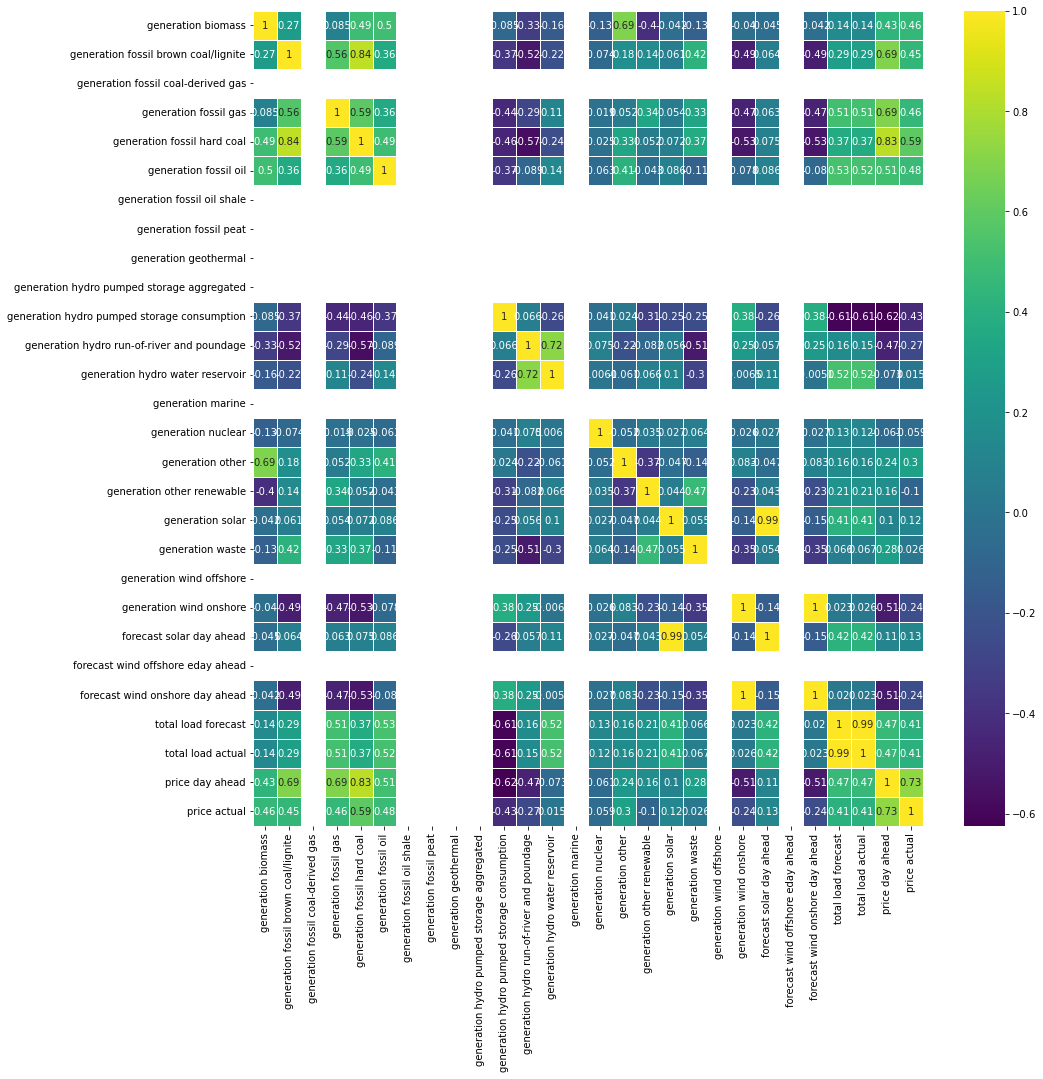

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='viridis',linewidth=0.9)
plt.show()

## Data Cleaning (EDA)

In [13]:
df['forecast solar day ahead']=df['forecast solar day ahead'].astype("float64")
df['forecast wind onshore day ahead']=df['forecast wind onshore day ahead'].astype("float64")
df['total load forecast']=df['total load forecast'].astype("float64")

In [14]:
df.drop('time', axis=1, inplace=True)

In [15]:
df['generation biomass'].fillna(df['generation biomass'].mean(), inplace=True)

In [16]:
df['generation fossil brown coal/lignite'].fillna(df['generation fossil brown coal/lignite'].mean(), inplace=True)

In [17]:
df.drop('generation fossil coal-derived gas', axis=1, inplace=True)

In [18]:
df['generation fossil gas'].fillna(df['generation fossil gas'].mean(), inplace=True) 

In [19]:
df['generation fossil hard coal'].fillna(df['generation fossil hard coal'].mean(), inplace=True)

In [20]:
df['generation fossil oil'].fillna(df['generation fossil oil'].mean(), inplace=True) 

In [21]:
df.drop('generation fossil oil shale', axis=1, inplace=True)

In [22]:
df.drop('generation fossil peat', axis=1, inplace=True)

In [23]:
df.drop('generation geothermal', axis=1, inplace=True)

In [24]:
df.drop('generation hydro pumped storage aggregated', axis=1, inplace=True)

In [25]:
df['generation hydro pumped storage consumption'].fillna(df['generation hydro pumped storage consumption'].mean(), inplace=True)

In [26]:
df['generation hydro run-of-river and poundage'].fillna(df['generation hydro run-of-river and poundage'].mean(), inplace=True)

In [27]:
df['generation hydro water reservoir'].fillna(df['generation hydro water reservoir'].mean(), inplace=True)

In [28]:
df.drop('generation marine', axis=1, inplace=True)

In [29]:
df['generation nuclear'].fillna(df['generation nuclear'].mean(), inplace=True)

In [30]:
df['generation other'].fillna(df['generation other'].mean(), inplace=True)

In [31]:
df['generation other renewable'].fillna(df['generation other renewable'].mean(), inplace=True)

In [32]:
df['generation solar'].fillna(df['generation solar'].mean(), inplace=True)

In [33]:
df['generation waste'].fillna(df['generation waste'].mean(), inplace=True)

In [34]:
df.drop('generation wind offshore', axis=1, inplace=True)

In [35]:
df['generation wind onshore'].fillna(df['generation wind onshore'].mean(), inplace=True)

In [36]:
df['forecast solar day ahead'].fillna(df['forecast solar day ahead'].mean(), inplace=True)

In [37]:
df.drop('forecast wind offshore eday ahead', axis=1, inplace=True)

In [38]:
df['total load actual'].fillna(df['total load actual'].mean(), inplace=True)

### Data after cleaning

In [38]:
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,338.0,609.0,3439.0,1450.0,182.0,3152.0,653.0,322.0,4952.0,54.0,74.0,24.0,281.0,13810.0,25.0,13793.0,21463.0,21697.0,10.88,20.32
16565,343.0,613.0,3451.0,1748.0,198.0,2500.0,663.0,320.0,5012.0,54.0,75.0,24.0,285.0,13656.0,16.0,13685.0,22266.0,22441.0,20.00,28.11
16566,355.0,736.0,3817.0,2548.0,226.0,1206.0,681.0,702.0,5018.0,54.0,81.0,24.0,290.0,13841.0,7.0,13742.0,25171.0,25567.0,35.00,43.18
16567,360.0,886.0,4268.0,3342.0,235.0,220.0,700.0,956.0,5018.0,55.0,90.0,31.0,296.0,14016.0,4.0,13960.0,29517.0,29818.0,46.40,53.06


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           16569 non-null  float64
 1   generation fossil brown coal/lignite         16569 non-null  float64
 2   generation fossil gas                        16569 non-null  float64
 3   generation fossil hard coal                  16569 non-null  float64
 4   generation fossil oil                        16569 non-null  float64
 5   generation hydro pumped storage consumption  16569 non-null  float64
 6   generation hydro run-of-river and poundage   16569 non-null  float64
 7   generation hydro water reservoir             16569 non-null  float64
 8   generation nuclear                           16569 non-null  float64
 9   generation other                             16569 non-null  float64
 10

### All the null values has been eliminated

In [40]:
df.isna().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

<AxesSubplot:xlabel='price actual', ylabel='Count'>

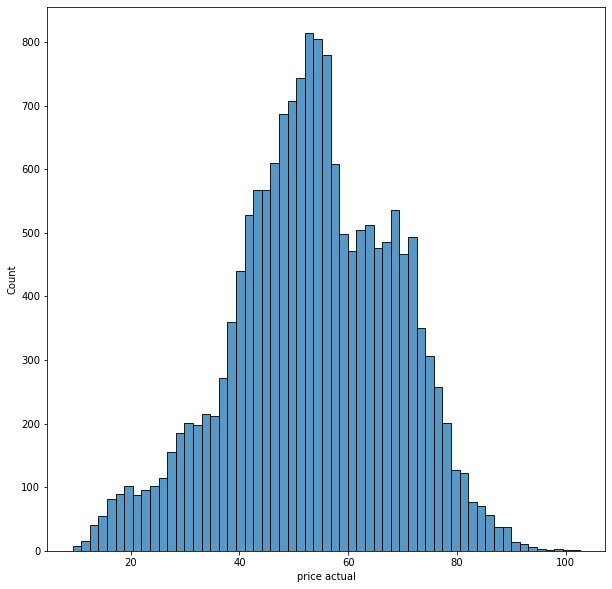

In [41]:
# Figure Size
plt.figure(figsize=(10,10))

# Hist graph to show distribution of target variable
sns.histplot(df,x='price actual')

### Data Exploration Findings -
1) Normal distrubution of target variable.

2) Low percentage of nan values in columns without 100% nan.

3) Lots of columns with 0 values for certain energy generation types.

4) Found very high correlation between some columns.

5) All data seems to be numeric.

## ML Model Creation

### Splitting of Data:-

In [39]:
x = df.iloc[:, :-1] #Predictors
y = df.iloc[:,-1] #Target

In [40]:
x    #Model creation

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,338.0,609.0,3439.0,1450.0,182.0,3152.0,653.0,322.0,4952.0,54.0,74.0,24.0,281.0,13810.0,25.0,13793.0,21463.0,21697.0,10.88
16565,343.0,613.0,3451.0,1748.0,198.0,2500.0,663.0,320.0,5012.0,54.0,75.0,24.0,285.0,13656.0,16.0,13685.0,22266.0,22441.0,20.00
16566,355.0,736.0,3817.0,2548.0,226.0,1206.0,681.0,702.0,5018.0,54.0,81.0,24.0,290.0,13841.0,7.0,13742.0,25171.0,25567.0,35.00
16567,360.0,886.0,4268.0,3342.0,235.0,220.0,700.0,956.0,5018.0,55.0,90.0,31.0,296.0,14016.0,4.0,13960.0,29517.0,29818.0,46.40


In [41]:
y

0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
16564    20.32
16565    28.11
16566    43.18
16567    53.06
16568    57.51
Name: price actual, Length: 16569, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,y_pred)

0.6110868983685229

In [46]:
linreg.coef_       #Model evaluation

array([ 1.00517532e-02, -5.57823069e-04,  4.12681265e-04,  1.74066448e-04,
        1.23471786e-02, -1.64922312e-04,  7.62456345e-06,  8.35404275e-04,
        4.24867589e-04, -1.47194913e-02, -2.45387035e-01, -2.50153299e-04,
       -1.29426398e-02, -1.09136669e-03,  1.10833659e-03,  1.92728356e-03,
        1.57015772e-04, -4.88431959e-04,  8.37276355e-01])

In [47]:
linreg.intercept_

26.408058485111383

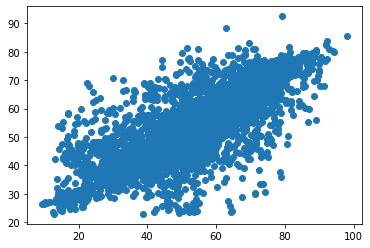

In [48]:
plt.scatter(y_test, y_pred)

<AxesSubplot:xlabel='price actual', ylabel='Density'>

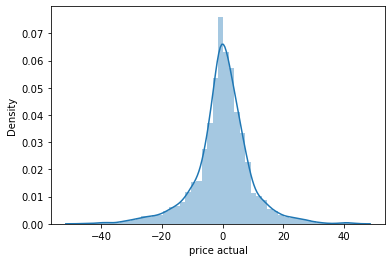

In [49]:
sns.distplot((y_test-y_pred))

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mae

6.433379273742641

In [51]:
mse = mean_squared_error(y_test, y_pred)
mse

87.76365935257307

In [52]:
rmse = np.sqrt(mse)
rmse

9.36822605153041

In [53]:
r2 = r2_score(y_test, y_pred)
r2

0.6110868983685229

In [54]:
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 6.433379273742641
MSE : 87.76365935257307
RMSE : 9.36822605153041
Accuracy : 0.6110868983685229


### Adjusted R2 score

In [55]:
X_test.shape

(4971, 19)

In [56]:
n = X_test.shape[0]
n

4971

In [57]:
num = (1-r2)*(n-1)
num

1932.898115108441

In [58]:
p = X_test.shape[1]
p

19

In [59]:
den = n-p-1
den

4951

In [60]:
adj_r2 = 1-(num/den)
adj_r2

0.6095944021190788

## Using Decision Tree Regressor

In [61]:
from sklearn.metrics import r2_score

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"{r2_score(y_test,y_pred)}")

0.6982957968975185


In [63]:
dt.score(X_train,y_train)

1.0

In [64]:
dt.score(X_test,y_test)

0.6982957968975185

In [65]:
#Making a function of my model
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(r2_score(y_test,y_pred))
    return model

### Hyperparameter tuning of model using DT

In [67]:
for i in range(1,51):
    dt1 = DecisionTreeRegressor(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

1 = 0.3779420070119571
2 = 0.4897990075681746
3 = 0.551635642262125
4 = 0.5935263735154148
5 = 0.6183003243898888
6 = 0.6396343971711524
7 = 0.6655405416936796
8 = 0.6792046814157936
9 = 0.6961980707360061
10 = 0.7086401598991373
11 = 0.7082075665433325
12 = 0.7244583757217619
13 = 0.7118156497377547
14 = 0.7044466350935057
15 = 0.7056704624397345
16 = 0.7007743793969323
17 = 0.6967445012657807
18 = 0.6915396563297852
19 = 0.7118744655958988
20 = 0.6947786166286685
21 = 0.7018857858932219
22 = 0.6995797293610245
23 = 0.7059997502541948
24 = 0.6950441237079896
25 = 0.6947932243408619
26 = 0.6890545826950961
27 = 0.6981141571570637
28 = 0.697980655254098
29 = 0.6914220689021731
30 = 0.7013929091233445
31 = 0.7034147573039452
32 = 0.6950629275820506
33 = 0.6976571099183333
34 = 0.6986219770754631
35 = 0.6982283321448468
36 = 0.6960374642605818
37 = 0.6881474927119249
38 = 0.6946005260836742
39 = 0.7059961024045068
40 = 0.6969792811330182
41 = 0.7012425442555538
42 = 0.7046252895855953
43 

In [68]:
dt1 = DecisionTreeRegressor(max_depth=12)
mymodel(dt1)

0.7128449428483387


DecisionTreeRegressor(max_depth=12)

In [69]:
dt1.score(X_train,y_train)

0.914023158579299

In [70]:
dt1.score(X_test,y_test)

0.7128449428483387

In [71]:
for i in range(2,100):
    dt2 = DecisionTreeRegressor(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred = dt2.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.6998026269617961
3 = 0.6992517561731333
4 = 0.6996382059567714
5 = 0.7031834705241151
6 = 0.7108785626525369
7 = 0.7072547276686163
8 = 0.7062538492179398
9 = 0.7153757983958329
10 = 0.7137442240793581
11 = 0.7062674542375073
12 = 0.7104968168685837
13 = 0.7076266436195988
14 = 0.7133485843844325
15 = 0.7129825015197568
16 = 0.7153112534212991
17 = 0.7106339531063943
18 = 0.7124383849526739
19 = 0.7173542121381317
20 = 0.710386747591526
21 = 0.7086826363828621
22 = 0.7111817296135745
23 = 0.7080665415628261
24 = 0.7142223732518457
25 = 0.7100826487433028
26 = 0.7126772796133268
27 = 0.711861116739273
28 = 0.7110148925532997
29 = 0.7122137424982699
30 = 0.7075985152912017
31 = 0.7070069377822464
32 = 0.7054648149963079
33 = 0.7062764391404002
34 = 0.70492898392683
35 = 0.7049934950154331
36 = 0.7048032599981343
37 = 0.7054957845400659
38 = 0.7051115627946218
39 = 0.7055340580778112
40 = 0.7048502361400156
41 = 0.7047630694070071
42 = 0.7076259527471402
43 = 0.7013702777538713
44 =

In [72]:
dt2 = DecisionTreeRegressor(min_samples_split=14)
mymodel(dt2)

0.7143382381960441


DecisionTreeRegressor(min_samples_split=14)

In [73]:
dt2.score(X_train,y_train)

0.9493268374483982

In [74]:
dt2.score(X_test,y_test)

0.7143382381960441

In [75]:
dt3 = DecisionTreeRegressor(max_depth=11, min_samples_split=14)
mymodel(dt3)

0.7139440259822805


DecisionTreeRegressor(max_depth=11, min_samples_split=14)

In [76]:
dt3.score(X_train,y_train)

0.8660631829605954

In [77]:
dt3.score(X_test,y_test)

0.7139440259822805

In [78]:
for i in range(2,100):
    dt4 = DecisionTreeRegressor(min_samples_leaf=i)
    dt4.fit(X_train,y_train)
    y_pred = dt4.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.7143459995709482
3 = 0.7206859310429761
4 = 0.7221462881132829
5 = 0.723597439130631
6 = 0.7202135570515492
7 = 0.7169544086657638
8 = 0.7215822784769366
9 = 0.7218460965163516
10 = 0.7147312409057235
11 = 0.7147869005402699
12 = 0.7080953029412385
13 = 0.7090865051804948
14 = 0.7106284712765849
15 = 0.7104265622055259
16 = 0.7077393768289912
17 = 0.7112237159544454
18 = 0.7090588826921367
19 = 0.7043501627808928
20 = 0.7055096985601115
21 = 0.7037364950487801
22 = 0.7024737592449706
23 = 0.6976325750769623
24 = 0.6997452082973931
25 = 0.7005617828766141
26 = 0.6993706048019275
27 = 0.6951518195510387
28 = 0.6964427087220343
29 = 0.6971884746724015
30 = 0.6959859933940329
31 = 0.6919178308065483
32 = 0.6893869143702978
33 = 0.6854814568581287
34 = 0.6855655284887621
35 = 0.6836446765711159
36 = 0.6861392871129883
37 = 0.6852811789120634
38 = 0.6854954938308764
39 = 0.6851079382882332
40 = 0.6853063471656219
41 = 0.6823433932105172
42 = 0.6791956528551801
43 = 0.6809845580127442
4

In [80]:
dt5 = DecisionTreeRegressor(min_samples_leaf=5)
mymodel(dt5)

0.7221122943919924


DecisionTreeRegressor(min_samples_leaf=5)

In [81]:
dt5.score(X_train,y_train)

0.9352591744057391

In [82]:
dt5.score(X_test,y_test)

0.7221122943919924

In [83]:
dt6 = DecisionTreeRegressor(max_depth=12, min_samples_split=14,min_samples_leaf=5)
mymodel(dt6)

0.7229899469180359


DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=14)

In [84]:
dt6.score(X_train,y_train)

0.8801551232341076

In [85]:
dt6.score(X_test,y_test)

0.7229899469180359

In [86]:
dt = DecisionTreeRegressor(max_depth=12, min_samples_split=14,min_samples_leaf=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"{r2_score(y_test,y_pred)}")

0.7210278951643516


## Using Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [88]:
from sklearn.metrics import accuracy_score, r2_score

In [89]:
mymodel(rf)

0.8576795338458794


RandomForestRegressor()

In [90]:
rf.score(X_train,y_train)

0.980288583299822

In [91]:
rf.score(X_test,y_test)

0.8576795338458794

### Hyperparameter tuning of model using Random Forest

In [92]:
for i in range(1,51):
    rf1 = RandomForestRegressor(max_depth=i)
    rf1.fit(X_train,y_train)
    y_pred = rf1.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

1 = 0.3839729863551199
2 = 0.5223185887708832
3 = 0.579864836195083
4 = 0.6239224743742546
5 = 0.6583731642882591
6 = 0.689633879205727
7 = 0.7249004660306906
8 = 0.7526536555768168
9 = 0.7760648372409577
10 = 0.8016571225060852
11 = 0.816501811372189
12 = 0.8286721057988662
13 = 0.8388232407614236
14 = 0.8441360439371013
15 = 0.8504313438765919
16 = 0.8532132238190574
17 = 0.8566402426737305
18 = 0.8586334968092892
19 = 0.8581419390541023
20 = 0.8584728491331827
21 = 0.8584805294761667
22 = 0.8613940336564685
23 = 0.8577497260540714
24 = 0.8597341020065419
25 = 0.8585261257793991
26 = 0.8603401087648664
27 = 0.8586119260759538
28 = 0.8600362334087579
29 = 0.8589861661038871
30 = 0.8583007794907478
31 = 0.8596490553664611
32 = 0.860071199893427
33 = 0.8590242419393055
34 = 0.8588037104196924
35 = 0.8606470598670105
36 = 0.8587784137427064
37 = 0.8599927747058257
38 = 0.8593817385615631
39 = 0.8607903333755154
40 = 0.8595236118046085
41 = 0.8603813985592259
42 = 0.860393203599739
43 = 0

In [93]:
rf2 = RandomForestRegressor(max_depth=42)
mymodel(rf2)

0.8602110205368657


RandomForestRegressor(max_depth=42)

In [94]:
rf2.score(X_train,y_train)

0.9804839065809865

In [95]:
rf2.score(X_test,y_test)

0.8602110205368657

In [96]:
for i in range(2,50):
    rf3 = RandomForestRegressor(min_samples_split=i)
    rf3.fit(X_train,y_train)
    y_pred = rf3.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.8591856295551434
3 = 0.8584322645289837
4 = 0.8565163271326225
5 = 0.8542856024272113
6 = 0.8540348014443563
7 = 0.8521920458899834
8 = 0.848160531735251
9 = 0.8452446669504365
10 = 0.8458726120545423
11 = 0.8436181622865119
12 = 0.8410099353996451
13 = 0.8385972025811745
14 = 0.8384555541177671
15 = 0.8316464329848334
16 = 0.8338422326940605
17 = 0.8293665324901212
18 = 0.8291912730561442
19 = 0.8236777937497868
20 = 0.8235255218569326
21 = 0.8229989177960849
22 = 0.8184923599230134
23 = 0.8184486873902
24 = 0.8155613325024635
25 = 0.8156597232722292
26 = 0.8125080690959066
27 = 0.8110093843816921
28 = 0.8079396268205439
29 = 0.8068273707616578
30 = 0.8065765153376006
31 = 0.8045634211984842
32 = 0.8026920987297178
33 = 0.8000878402875855
34 = 0.8005605327343698
35 = 0.7995758645778321
36 = 0.7939244552081605
37 = 0.7967997643840776
38 = 0.7924725664768407
39 = 0.7934820606394858
40 = 0.7913653021783369
41 = 0.7881378785789099
42 = 0.7875679735611422
43 = 0.7866254164543531
44 =

In [97]:
rf4 = RandomForestRegressor(min_samples_split=2)
mymodel(rf4)

0.8600051984411963


RandomForestRegressor()

In [98]:
rf4.score(X_train,y_train)

0.9805804213464466

In [99]:
rf4.score(X_test,y_test)

0.8600051984411963

In [100]:
rf5 = RandomForestRegressor(max_depth=42 ,min_samples_split=2)
mymodel(rf5)

0.8595230540611378


RandomForestRegressor(max_depth=42)

In [101]:
rf5.score(X_train,y_train)

0.9806576667823516

In [102]:
rf5.score(X_test,y_test)

0.8595230540611378

In [103]:
for i in range(2,50):
    rf6 = RandomForestRegressor(min_samples_leaf=i)
    rf6.fit(X_train,y_train)
    y_pred = rf6.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.8538407944790966
3 = 0.8477694789666355
4 = 0.8384320718150462
5 = 0.8311281239319745
6 = 0.8263544588907141
7 = 0.8205006806936179
8 = 0.8143002466818144
9 = 0.8083878431519101
10 = 0.8035383544264901
11 = 0.7978015034501738
12 = 0.7924429278803404
13 = 0.7898705965125798
14 = 0.7834330923206014
15 = 0.7785350779828409
16 = 0.7739336420056688
17 = 0.7724931685861491
18 = 0.7684985172043354
19 = 0.7657557471960945
20 = 0.7633905521141469
21 = 0.7593960795244169
22 = 0.7578232438585752
23 = 0.7526995984691243
24 = 0.7508105399958521
25 = 0.747884864253967
26 = 0.7448338252767635
27 = 0.7427962141452251
28 = 0.740992554649625
29 = 0.7389016735919712
30 = 0.7360204151247334
31 = 0.732352587089605
32 = 0.7312011900733386
33 = 0.7303898049986244
34 = 0.7278759164390046
35 = 0.7272967471425018
36 = 0.7244698685068872
37 = 0.7223443559602445
38 = 0.7220098567222684
39 = 0.7192580196366123
40 = 0.7184867168078068
41 = 0.7171902927151943
42 = 0.7154195679648121
43 = 0.713862652023429
44 =

In [104]:
rf7 = RandomForestRegressor(min_samples_leaf=2)
mymodel(rf7)

0.8532388236199198


RandomForestRegressor(min_samples_leaf=2)

In [105]:
rf7.score(X_train,y_train)

0.9696165010548331

In [106]:
rf7.score(X_test,y_test)

0.8532388236199198

In [107]:
rf8 = RandomForestRegressor(max_depth=42,min_samples_split=2, min_samples_leaf=5)
mymodel(rf8)

0.8326428324813088


RandomForestRegressor(max_depth=42, min_samples_leaf=5)

In [108]:
rf8.score(X_train,y_train)

0.9341842040476933

In [109]:
rf8.score(X_test,y_test)

0.8326428324813088

In [110]:
0.9338-0.8321

0.10170000000000001

## Using XGBoosting Regressor

In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from xgboost import XGBRegressor

In [113]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(f"{r2_score(y_test,y_pred)}")

0.8610736486973951


In [114]:
xgb.score(X_train,y_train)

0.9602158001709231

In [115]:
xgb.score(X_test,y_test)

0.8610736486973951

In [116]:
0.96021-0.8610

0.09921000000000002

In [133]:
for i in range(2,150):
    xgb2 = XGBRegressor(n_estimators=i)
    xgb2.fit(X_train,y_train)
    y_pred = xgb2.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = -2.5201148993275475
3 = -0.8970193067916645
4 = -0.09038059822092737
5 = 0.3113571995734733
6 = 0.5158663831719467
7 = 0.6209044864875128
8 = 0.6751088928020805
9 = 0.7068131328475561
10 = 0.7249124224864074
11 = 0.7362210062301012
12 = 0.7447600829253216
13 = 0.754004127901183
14 = 0.7579762937216867
15 = 0.7610936259057923
16 = 0.7702665482227443
17 = 0.7716436695612098
18 = 0.7758621644814475
19 = 0.7780002055284528
20 = 0.7795363923428134
21 = 0.7820652061268709
22 = 0.7869312625130374
23 = 0.7922562398804046
24 = 0.7946576676352319
25 = 0.7978184488128887
26 = 0.7994358628502016
27 = 0.8033095932128458
28 = 0.8044376553440682
29 = 0.8067150729449177
30 = 0.809214615976704
31 = 0.8121392166828477
32 = 0.8134657437537347
33 = 0.8137901689459813
34 = 0.8149241097096026
35 = 0.8155021047655506
36 = 0.8157709534825421
37 = 0.8159587976926955
38 = 0.8172236157068722
39 = 0.8211582629285639
40 = 0.8242437014590062
41 = 0.8245736421185553
42 = 0.8249468448026454
43 = 0.825624478536138

In [135]:
for i in range(2,50):
    xgb3 = XGBRegressor(max_depth=i)
    xgb3.fit(X_train,y_train)
    y_pred = xgb3.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.7074099558943381
3 = 0.7633027450377077
4 = 0.8146785904164482
5 = 0.8395859451030473
6 = 0.8610736486973951
7 = 0.8734103792578196
8 = 0.8772317718740632
9 = 0.87669140144496
10 = 0.8773821821101611
11 = 0.878797836626688
12 = 0.876373440452577
13 = 0.875011103069286
14 = 0.8749492111627035
15 = 0.8757165749782129
16 = 0.8736546991457435
17 = 0.8737715936005654
18 = 0.8721393430452983
19 = 0.8729846869410767
20 = 0.8671563658373114
21 = 0.8710413915590367
22 = 0.8729821295994227
23 = 0.8685225747952413
24 = 0.870366025882121
25 = 0.869384349549761
26 = 0.8702594508639395
27 = 0.8708398028227865
28 = 0.8712376843176112
29 = 0.8714504729985673
30 = 0.8709585724550168
31 = 0.8699629266668415
32 = 0.8698837592551135
33 = 0.8706168841120598
34 = 0.870360858739363
35 = 0.8692961455229179
36 = 0.8692868961947836
37 = 0.8695698745593842
38 = 0.8694758038124402
39 = 0.869427279074672
40 = 0.8693991907999943
41 = 0.8693741336501819
42 = 0.8693961247295381
43 = 0.8693782238494268
44 = 0.86

In [137]:
for i in range(2,50):
    xgb4 = XGBRegressor(max_leaves=i)
    xgb4.fit(X_train,y_train)
    y_pred = xgb4.predict(X_test)
    print(f"{i} = {r2_score(y_test,y_pred)}")

2 = 0.8610736486973951
3 = 0.8610736486973951
4 = 0.8610736486973951
5 = 0.8610736486973951
6 = 0.8610736486973951
7 = 0.8610736486973951
8 = 0.8610736486973951
9 = 0.8610736486973951
10 = 0.8610736486973951
11 = 0.8610736486973951
12 = 0.8610736486973951
13 = 0.8610736486973951
14 = 0.8610736486973951
15 = 0.8610736486973951
16 = 0.8610736486973951
17 = 0.8610736486973951
18 = 0.8610736486973951
19 = 0.8610736486973951
20 = 0.8610736486973951
21 = 0.8610736486973951
22 = 0.8610736486973951
23 = 0.8610736486973951
24 = 0.8610736486973951
25 = 0.8610736486973951
26 = 0.8610736486973951
27 = 0.8610736486973951
28 = 0.8610736486973951
29 = 0.8610736486973951
30 = 0.8610736486973951
31 = 0.8610736486973951
32 = 0.8610736486973951
33 = 0.8610736486973951
34 = 0.8610736486973951
35 = 0.8610736486973951
36 = 0.8610736486973951
37 = 0.8610736486973951
38 = 0.8610736486973951
39 = 0.8610736486973951
40 = 0.8610736486973951
41 = 0.8610736486973951
42 = 0.8610736486973951
43 = 0.8610736486973951


In [339]:
xgb5 = XGBRegressor(n_estimators=130 ,max_depth=4 , max_leaves=2)
xgb5.fit(X_train,y_train)
y_pred = xgb5.predict(X_test)
print(f"{r2_score(y_test,y_pred)}")

0.8269507943692813


In [340]:
xgb5.score(X_train, y_train)

0.8972725578781894

In [341]:
xgb5.score(X_test, y_test)

0.8269507943692813

In [268]:
0.897-0.826


0.07100000000000006

## Creating the model

In [278]:
def predictprice(gen_biomass, gen_fossil, gen_fossil_gas, gen_fossil_coal, gen_fossil_oil, gen_hydro_pump_sc, gen_hydro_pondage, gen_hydro_wr, gen_nuclear, gen_other, gen_other_r, gen_solar, gen_waste, gen_windoshore, for_solar_da, for_wind_oda, total_load_f, total_load_a, price_day_a):
    newobs = [[gen_biomass, gen_fossil, gen_fossil_gas, gen_fossil_coal, gen_fossil_oil, gen_hydro_pump_sc, gen_hydro_pondage, gen_hydro_wr, gen_nuclear, gen_other, gen_other_r, gen_solar, gen_waste, gen_windoshore, for_solar_da, for_wind_oda, total_load_f, total_load_a, price_day_a]] #x features always in two dimensions
    yp = rf8.predict(newobs)[0]
    print(f"The actual price of your energy consumption is {yp:.2f} units")
    return yp

In [282]:
def predictprice1(gen_biomass, gen_fossil, gen_fossil_gas, gen_fossil_coal, gen_fossil_oil, gen_hydro_pump_sc, gen_hydro_pondage, gen_hydro_wr, gen_nuclear, gen_other, gen_other_r, gen_solar, gen_waste, gen_windoshore, for_solar_da, for_wind_oda, total_load_f, total_load_a, price_day_a):
    newobs = [[gen_biomass, gen_fossil, gen_fossil_gas, gen_fossil_coal, gen_fossil_oil, gen_hydro_pump_sc, gen_hydro_pondage, gen_hydro_wr, gen_nuclear, gen_other, gen_other_r, gen_solar, gen_waste, gen_windoshore, for_solar_da, for_wind_oda, total_load_f, total_load_a, price_day_a]] #x features always in two dimensions
    yp = xgb5.predict(newobs)[0]
    print(f"The actual price of your energy consumption is {yp:.2f} units")
    return yp

In [279]:
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,338.0,609.0,3439.0,1450.0,182.0,3152.0,653.0,322.0,4952.0,54.0,74.0,24.0,281.0,13810.0,25.0,13793.0,21463.0,21697.0,10.88,20.32
16565,343.0,613.0,3451.0,1748.0,198.0,2500.0,663.0,320.0,5012.0,54.0,75.0,24.0,285.0,13656.0,16.0,13685.0,22266.0,22441.0,20.00,28.11
16566,355.0,736.0,3817.0,2548.0,226.0,1206.0,681.0,702.0,5018.0,54.0,81.0,24.0,290.0,13841.0,7.0,13742.0,25171.0,25567.0,35.00,43.18
16567,360.0,886.0,4268.0,3342.0,235.0,220.0,700.0,956.0,5018.0,55.0,90.0,31.0,296.0,14016.0,4.0,13960.0,29517.0,29818.0,46.40,53.06


### Data for example to check the model :-

- generation biomass - 447.0
- generation fossil brown coal/lignite - 329.0
- generation fossil gas - 4844.0
- generation fossil hard - 4821.0
- generation fossil oil - 162.0
- generation hydro pumped storage consumption - 863.0
- generation hydro run-of-river and poundage - 1051.0
- generation hydro water reservoir - 1899.0
- generation nuclear - 7096.0
- generation other - 43.0
- generation other renewable - 73.0
- generation solar - 49.0
- generation waste - 196.0
- generation wind onshore - 6378.0
- forecast solar day ahead - 17.0
- forecast wind onshore day ahead - 6436.0
- total load forecast - 26118.0
- total load actual - 25385.0
- price day ahead - 50.10


In [280]:
predictprice(447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10)

The actual price of your energy consumption is 64.39 units


64.39231718503716